In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import csv

G=nx.Graph()

limiter = []
with open("casts.csv", "r") as file:
    line = file.readline()
    reader = csv.reader(file, delimiter=';', quotechar='"')

    actors = []
    last_title = ""
    cnt = 0
    for (id, title, actor, _, _) in reader:
        if actor not in limiter and len(limiter) < 1000:
            limiter.append(actor)
        if last_title == title:
            # filter out this weird actor name - probably some placeholder
            if actor != "s a" and actor in limiter:
                actors.append(actor)
        else:
            # generate all unordered pairs of distinct actors of the list
            for a, b in itertools.combinations(actors, 2):
                G.add_edge(a, b)
            
            last_title = title
            actors = []

## Visualise graph with with first 1000 actors

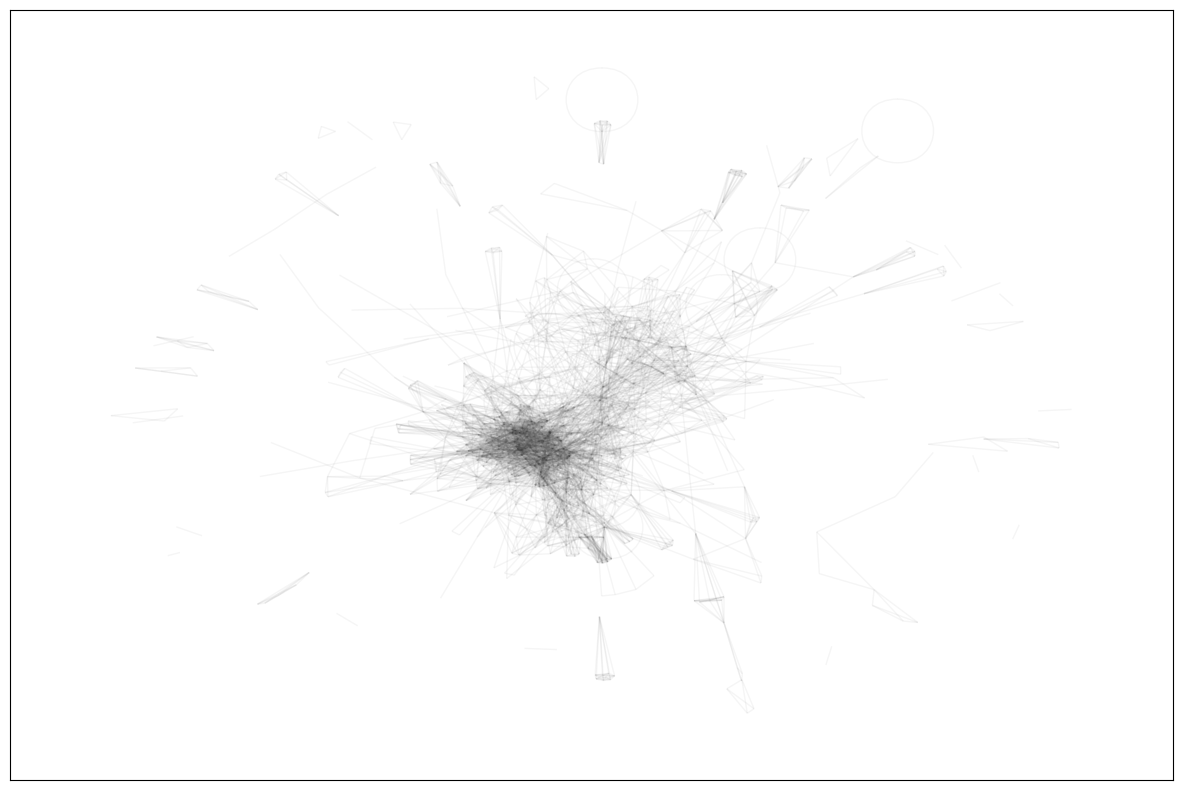

In [26]:
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)


def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

pos = nx.spring_layout(G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)
plt.show()

In [27]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
len(communities)

59

## Give every comunity color

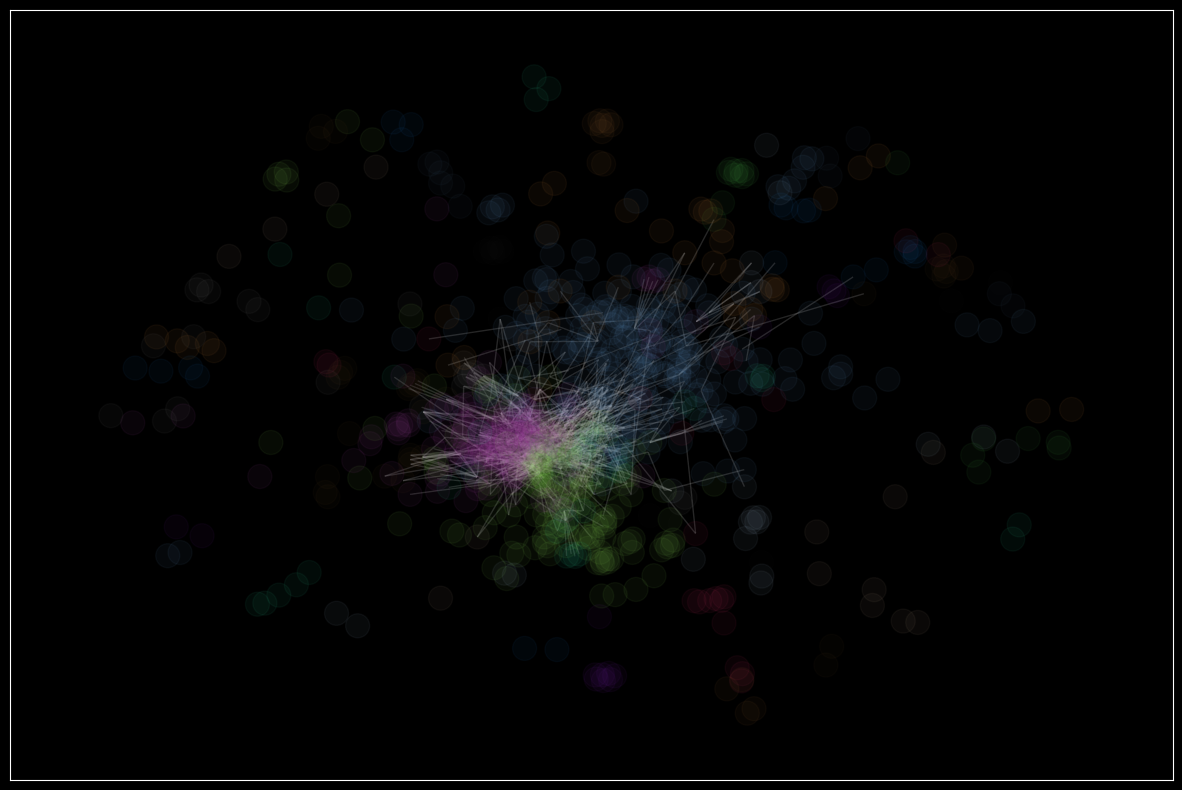

In [28]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver",
    node_color=node_color,
    alpha=0.2,
    with_labels=False)
# internal edges
nx.draw_networkx(
    G, pos=pos,
    edgelist=internal,
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05,
    with_labels=False)
plt.show()

## K-Cores
maximal connected subgraph of G in which all vertices have degree at least k

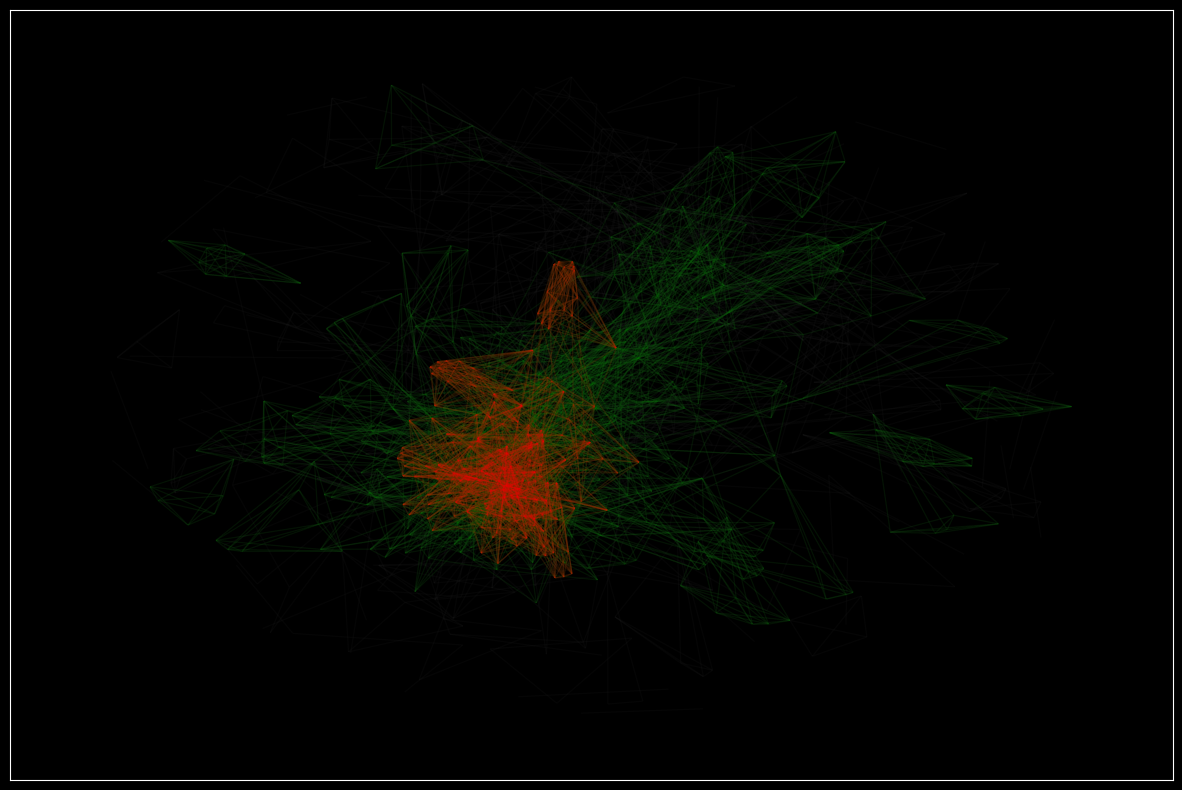

In [40]:
G.remove_edges_from(nx.selfloop_edges(G))

# cores with at lest degree 30
G_core_5 = nx.k_core(G, 5)
# similarly, with at least degree 60
G_core_10 = nx.k_core(G, 10)
# Visualize network and k-cores
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx(
    G, pos=pos, node_size=0, edge_color="#333333", alpha=0.1, with_labels=False)
nx.draw_networkx(
    G_core_5, pos=pos, node_size=0, edge_color="green", alpha=0.1, with_labels=False)
nx.draw_networkx(
    G_core_10, pos=pos, node_size=0, edge_color="red", alpha=0.1, with_labels=False)

plt.show()